## Load data

In [8]:
import pandas as pd

# Load the CSV
file_path = "../data/discussions_collab.csv"
df_comments_all = pd.read_csv(file_path)

file_path = "../data/pre_survey_anon.csv"
df_pre_all = pd.read_csv(file_path)

file_path = "../data/post_surveys_anon.csv"
df_post_all = pd.read_csv(file_path)


## Analytical dataset

We first identify the set of users with all data.

We also have to make sure topic correspondence between survey and comment data.

In [9]:
import numpy as np

users_comments = df_comments_all['ParticipantID'].unique().astype(str)
users_pre = df_pre_all['ParticipantID'].unique().astype(str)
users_post = df_post_all['ParticipantID'].unique().astype(str)

users_shared_prepost = np.intersect1d(users_post, users_pre)
users_shared_precomments = np.intersect1d(users_comments, users_pre)
users_shared_postcomments = np.intersect1d(users_comments, users_post)
print('pre | comments | post: ', [len(users_pre),len(users_comments),len(users_post)])
print('pre/post | pre/comments | post/comments: ', [len(users_shared_prepost),len(users_shared_precomments),len(users_shared_postcomments)])

#users = np.intersect1d(np.intersect1d(userscomments, userspre), userspost)
users = users_shared_prepost
print('Valid Users: ', ' -> ', len(users))

#users = np.intersect1d(userscomments, userspre)
#print(len(users))

topics = df_comments_all['post_title'].unique().astype(str)
topics_survey = ['issue_attitudes_ukraine','issue_attitudes_renewable','issue_attitudes_immigration','issue_attitudes_fur','issue_attitudes_ubi','issue_attitudes_vaccine','issue_attitudes_airbnb','issue_attitudes_gaza','issue_attitudes_sexwork','issue_attitudes_socialmedia','issue_attitudes_healthcare','issue_attitudes_bodycams','issue_attitudes_minwage','issue_attitudes_guns','issue_attitudes_loan','issue_attitudes_deathpenalty','issue_attitudes_climate','issue_attitudes_vegetarian','issue_attitudes_ai','issue_attitudes_gender']

subreddits = df_comments_all['subreddit'].unique().astype(str)

#print(topics)
#len(topics_survey)
#print(subreddits)

df_pre = df_pre_all[df_pre_all['ParticipantID'].isin(users)]
df_comments = df_comments_all[df_comments_all['ParticipantID'].isin(users)]
df_post = df_post_all[df_post_all['ParticipantID'].isin(users)]
#print('User Numbers: ', [len(df_post_all),len(df_post)] , '->', len(df_post['ParticipantID'].unique()) )


pre | comments | post:  [788, 335, 398]
pre/post | pre/comments | post/comments:  [398, 334, 304]
Valid Users:   ->  398


### Dealing with NaNs

... I am struggling with differences to what I had in MatLab ...

In [10]:
consider = topics_survey.copy()  # Creates a new, independent copy of topics_survey
print(topics_survey)
consider.append('ParticipantID') 
consider.append('subreddit')

df_pre_atts = df_pre[consider]
df_post_atts = df_post[consider]
print(len(df_post),len(df_post_atts),len(df_post['ParticipantID'].unique()) )
print(df_post_atts.shape)
NANs = 0
consider = []
for rx, row in df_post_atts.iterrows():
    thisrow = 0;
    for ex,ele in enumerate(row):
        if ex < len(topics):
            #print(type(ele))
            if np.isnan( ele):
                #NANs=NANs+1
                thisrow = thisrow+1
#            else:
#                print(ele)
    if thisrow > 0:
        NANs=NANs+1
    else:
        consider.append(  rx  )
        
print(NANs,len(consider))
#print(consider)
df_post_atts_clean = df_post_atts.iloc[ consider ]

#print(df_post.loc[ df_post[ 'ParticipantID' ] == user , 'issue_knowledge_ai' ].values[0])

#filtered_df_post = df_post[consider]
print( len( df_post_atts_clean ),len( df_post_atts_clean['ParticipantID'].unique() ) )
print(len(  np.intersect1d( df_post_atts_clean['ParticipantID'], users_pre ) ))
users = df_post_atts_clean['ParticipantID'].unique()


['issue_attitudes_ukraine', 'issue_attitudes_renewable', 'issue_attitudes_immigration', 'issue_attitudes_fur', 'issue_attitudes_ubi', 'issue_attitudes_vaccine', 'issue_attitudes_airbnb', 'issue_attitudes_gaza', 'issue_attitudes_sexwork', 'issue_attitudes_socialmedia', 'issue_attitudes_healthcare', 'issue_attitudes_bodycams', 'issue_attitudes_minwage', 'issue_attitudes_guns', 'issue_attitudes_loan', 'issue_attitudes_deathpenalty', 'issue_attitudes_climate', 'issue_attitudes_vegetarian', 'issue_attitudes_ai', 'issue_attitudes_gender']
979 979 398
(979, 22)
641 338
338 338
338


## Two approaches to define group opinion

The first one takes the opinions of all group members.

The second just the opinions of the active ones.

In [11]:
tx = 9
print(topics[tx],topics_survey[tx])
srx = 4

filtered_df_pre = df_pre[df_pre['subreddit'] == subreddits[srx]]
attsAll = filtered_df_pre[ topics_survey[tx] ]
## over all subreddits
#filtered_df_pre = df_pre[df_pre['subreddit'].isin(subreddits)]
#attsAll = filtered_df_pre[ topics_survey ]

print(len(filtered_df_pre) , len(attsAll) , attsAll.mean())

filtered_df = df_comments[df_comments['post_title'].isin([topics[tx]])]
filtered_df = filtered_df[filtered_df['subreddit'].isin([subreddits[srx]])]
## over all subreddits
#filtered_df = filtered_df[filtered_df['subreddit'].isin(subreddits)]

group_users = filtered_df['ParticipantID']
filtered_df_pre = df_pre[df_pre['ParticipantID'].isin(group_users)]
attsAct = filtered_df_pre[ topics_survey[tx] ]


attsComments = pd.concat([
    filtered_df_pre.loc[filtered_df_pre['ParticipantID'] == user, topics_survey[tx]]
    for user in group_users
], ignore_index=True)


engaged_df = filtered_df[filtered_df['root_comment']==0]
print(len(engaged_df))
engaged_users = engaged_df['ParticipantID']
filtered_df_pre = df_pre[df_pre['ParticipantID'].isin(engaged_users)]

attsEngaged = pd.concat([
    filtered_df_pre.loc[filtered_df_pre['ParticipantID'] == user, topics_survey[tx]]
    for user in engaged_users
], ignore_index=True)



## over all subreddits
#attsAct = filtered_df_pre[ topics_survey ]
print(len(filtered_df) , len(attsAct) , attsAct.mean())
print(len(filtered_df) , len(attsComments) , attsComments.mean())
#print(len(engaged_df) , len(attsEngaged) , engaged_df.mean())

print(subreddits[srx])

Social media is a threat to democracy. issue_attitudes_socialmedia
71 71 3.507042253521127
9
26 20 3.2
26 26 3.1153846153846154
DiscussPolitics5


## Active users versus entire group

Let's look at the rate of participation per opinion

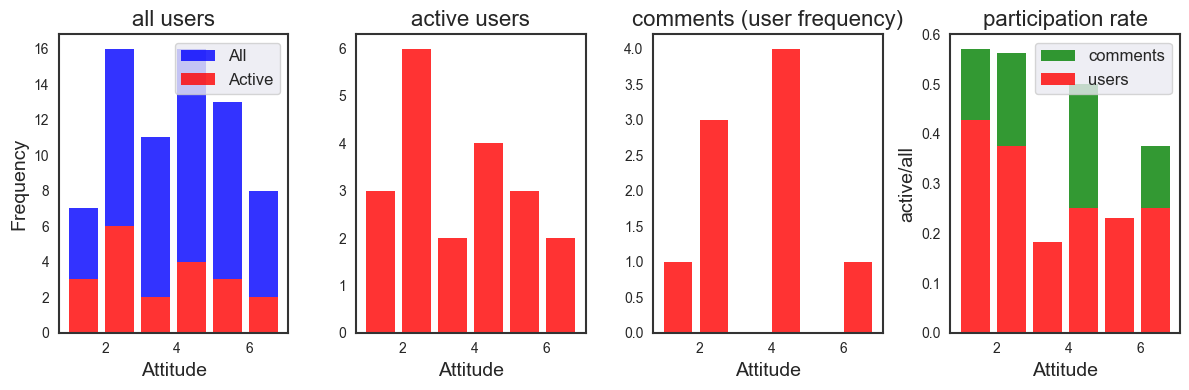

In [12]:
import matplotlib.pyplot as plt
#plt.style.use("ggplot")

data = {
    "Column1": attsAll,
    "Column2": attsAct,
    "Column3": attsEngaged,
}
df = pd.DataFrame(data)

# Define bins for the histogram
bins = np.linspace(1, 7, 7)  # Adjust the number of bins as needed

# Compute histogram values for both columns
hist1, bin_edges = np.histogram(df["Column1"], bins=bins)
hist2, _ = np.histogram(df["Column2"], bins=bins)
hist3, _ = np.histogram(df["Column3"], bins=bins)

# Define bar width and positions
bar_width = 0.8 * (bin_edges[1] - bin_edges[0])  # Set bar width as a fraction of bin width
bar_positions = bin_edges[:-1] + (bar_width / 2)  # Adjust bar positions

# Plot stacked bars
#plt.figure(figsize=(8, 6))
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharey=False, facecolor="white")

for ax in axes:
    ax.set_facecolor("white")  # White background for each subplot
    #ax.grid(axis="both", linestyle="-", alpha=0.7, color="gray")
    ax.set_xlabel("Attitude", fontsize=14)
    for spine in ax.spines.values():
        spine.set_visible(True)  # Ensure all spines are visible
        spine.set_edgecolor([0.2,0.2,0.2])  # Set the frame color
        spine.set_linewidth(1.5)  # Adjust the frame thickness

edge_width=0.0
bar_alpha = 0.8

axes[0].bar(bar_positions, hist1-hist2, width=bar_width,bottom = hist2, label="All", color="blue",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)
axes[0].bar(bar_positions, hist2, width=bar_width, label="Active", color="red",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)

# Add titles and labels
axes[0].set_title("all users", fontsize=16)
#axes[0].set_xlabel("Attitude", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].legend(fontsize=12)
#axes[0].set_facecolor("white")
#axes[0].grid(axis="y", linestyle="--", alpha=0.7)

axes[1].set_title("active users", fontsize=16)
axes[1].bar(bar_positions, hist2, width=bar_width, label="All", color="red",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)
#axes[1].set_xlabel("Attitude", fontsize=14)
#axes[1].set_facecolor("white")

axes[2].set_title("comments (user frequency)", fontsize=16)
axes[2].bar(bar_positions, hist3, width=bar_width, label="All", color="red",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)

axes[3].set_title("participation rate", fontsize=16)
axes[3].bar(bar_positions, hist3/(hist1), width=bar_width,bottom=hist2/(hist1) , label="comments", color="green",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)
axes[3].bar(bar_positions, hist2/(hist1), width=bar_width, label="users", color="red",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)
#axes[4].set_xlabel("Attitude", fontsize=14)
axes[3].set_ylabel("active/all", fontsize=14)
axes[3].legend(fontsize=12)
#axes[4].set_facecolor("white")
# Adjust layout
plt.tight_layout()
# Save the figure as a PDF
fig.savefig("histograms.pdf", format="pdf",facecolor="white")
fig.savefig("histograms.png", format="png",facecolor="white")
# Show the plot
plt.show()

In [13]:
import numpy as np
from scipy.stats import entropy

# Example histograms
# Ensure hist1 and hist2 are already computed as frequency counts
# hist1 and hist2 should not contain negative or zero values before normalization

# Normalize histograms to probability distributions
p = hist1 / np.sum(hist1)
q = hist2 / np.sum(hist2)

# Add a small value (epsilon) to avoid log(0) issues
epsilon = 1e-10
p = np.clip(p, epsilon, None)
q = np.clip(q, epsilon, None)

# Compute KL Divergence
kl_divergence = entropy(q, p)

print(f"KL Divergence: {kl_divergence}")


KL Divergence: 0.03929047064690222


## Building the input signal from the discussion

In [14]:
GOall = np.zeros( (len(topics), len(subreddits)) )
GOact = np.zeros( (len(topics), len(subreddits)) )
GOcomments = np.zeros( (len(topics), len(subreddits)) )
KLDiv = np.zeros( (len(topics), len(subreddits)) )

for tx,topic in enumerate(topics):
    for srx,subreddit in enumerate(subreddits):
        filtered_df_pre = df_pre[df_pre['subreddit'] == subreddits[srx]]
        attsAll = filtered_df_pre[ topics_survey[tx] ]
        GOall[tx,srx] = attsAll.mean()
        
        filtered_df = df_comments[df_comments['post_title'].isin([topics[tx]])]
        filtered_df = filtered_df[filtered_df['subreddit'].isin([subreddits[srx]])]
        group_users = filtered_df['ParticipantID']
        filtered_df_pre = df_pre[df_pre['ParticipantID'].isin(group_users)]
        attsAct = filtered_df_pre[ topics_survey[tx] ]
        GOact[tx,srx] = attsAct.mean()

        attsComments = pd.concat([
            filtered_df_pre.loc[filtered_df_pre['ParticipantID'] == user, topics_survey[tx]]
            for user in group_users
        ], ignore_index=True)
        GOcomments[tx,srx] = attsComments.mean()

        data = {
            "Column1": attsAll,
            "Column2": attsAct,
            "Column3": attsComments,
        }
        df = pd.DataFrame(data)

        # Define bins for the histogram
        bins = np.linspace(1, 6, 6)  # Adjust the number of bins as needed

        # Compute histogram values for both columns
        hist1, bin_edges = np.histogram(df["Column1"], bins=bins)
        hist2, _ = np.histogram(df["Column2"], bins=bins)
        hist3, _ = np.histogram(df["Column3"], bins=bins)

        # Normalize histograms to probability distributions
        p = hist1 / np.sum(hist1)
        q = hist3 / np.sum(hist3)

        # Add a small value (epsilon) to avoid log(0) issues
        epsilon = 1e-10
        p = np.clip(p, epsilon, None)
        q = np.clip(q, epsilon, None)

        # Compute KL Divergence
        KLDiv[tx,srx] = entropy(q, p)        
        
        print( len(filtered_df), topic, topics_survey[tx] , GOall[tx,srx] , GOact[tx,srx] , KLDiv[tx,srx])
        
    

17 The US should provide financial and military aid to Ukraine. issue_attitudes_ukraine 4.225806451612903 5.363636363636363 0.31165915715569725
46 The US should provide financial and military aid to Ukraine. issue_attitudes_ukraine 4.163934426229508 4.476190476190476 0.19922330825775594
59 The US should provide financial and military aid to Ukraine. issue_attitudes_ukraine 4.589285714285714 4.296296296296297 0.36400195354141723
34 The US should provide financial and military aid to Ukraine. issue_attitudes_ukraine 4.507692307692308 5.1 0.07784662316600166
37 The US should provide financial and military aid to Ukraine. issue_attitudes_ukraine 4.535211267605634 3.9523809523809526 0.03831419779035322
64 The US should provide financial and military aid to Ukraine. issue_attitudes_ukraine 4.626506024096385 4.7272727272727275 0.17204046811598392
18 The government should not invest in renewable energy. issue_attitudes_renewable 1.467741935483871 1.4666666666666666 0.08088620807582236
33 The g

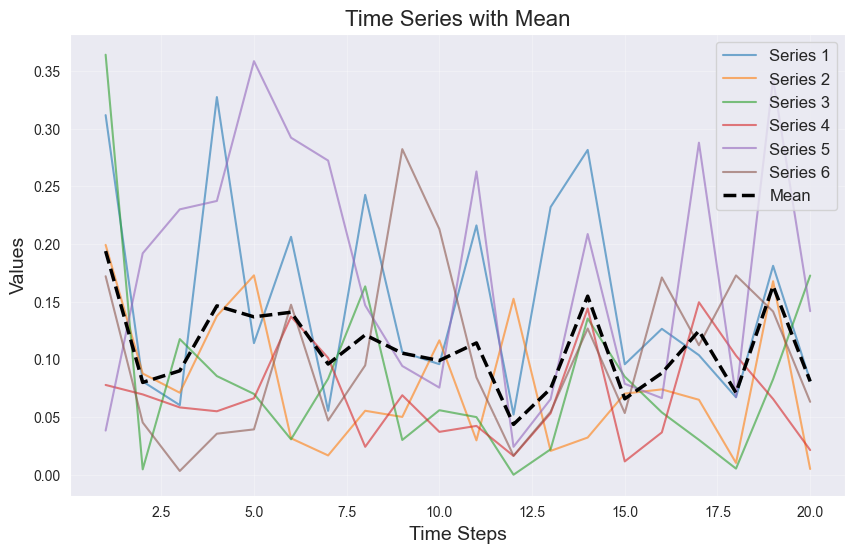

In [15]:
time_steps = np.arange(1, 21)  # Time steps (1 to 20)

# Example data
#data = abs(GOact - GOall)
data = KLDiv  # Replace with your actual matrix

# Plot each column as a line
plt.figure(figsize=(10, 6))


for i in range(data.shape[1]):
    plt.plot(time_steps, data[:, i], label=f"Series {i+1}", alpha=0.6)  # Individual lines

# Compute and plot the mean as a thick line
mean_values = np.mean(data, axis=1)
plt.plot(time_steps, mean_values, label="Mean", color="black", linewidth=2.5, linestyle="--")  # Thick mean line

# Add labels, legend, and title
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Time Series with Mean", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# # Create a matrix plot (heatmap)
# plt.figure(figsize=(8, 6))
# plt.imshow(data, aspect='auto', cmap='viridis', interpolation='nearest')
# 
# # Add colorbar for reference
# plt.colorbar(label="Value")
# 
# # Add axis labels and title
# plt.xticks(ticks=np.arange(6), labels=[f"Col {i+1}" for i in range(6)], fontsize=10)
# plt.yticks(ticks=np.arange(20), labels=[f"Step {i+1}" for i in range(20)], fontsize=8)
# plt.xlabel("Columns", fontsize=12)
# plt.ylabel("Time Steps", fontsize=12)
# plt.title("Matrix Plot of 20x6 Data", fontsize=14)
# 
# # Show the plot
# plt.tight_layout()
# plt.show()

## Build dataset for model estimation

In [16]:

Obs = np.zeros( (len(users) * len(topics), 5) )  # Initialize the Obs array
Obs_data = []
print(df_pre_atts.shape,df_post_atts_clean.shape,Obs.shape)
print(len(users) , len(topics))

print(subreddits)

for ux,user in enumerate(users):
    ux_post = df_post_atts_clean[ df_post_atts_clean['ParticipantID'] == user ].values
    ux_pre = df_pre_atts[ df_pre_atts['ParticipantID'] == user ].values
    
    #srx = df_pre_atts.loc[ df_pre_atts['ParticipantID'] == user , 'subreddit' ]
    subreddit = df_pre_atts.loc[df_pre_atts['ParticipantID'] == user, 'subreddit'].iloc[0]
    #print(type(subreddits))
    srx = np.where(subreddits == subreddit)[0][0]
    #srx = subreddits.index(subreddit)

    #print(srx)
    
    for tx,topic in enumerate(topics_survey):
        ix = tx + ux * len(topics)  # Compute the linear index
        #print(ux_pre[0,tx])
        Obs[ix,0] = (ux_pre[0,tx] -1 )/2.5 -1 
        Obs[ix,1] = (ux_post[0,tx] -1 )/2.5 -1
        Obs[ix,2] = (GOall[tx,srx] -1 )/2.5 -1
        Obs[ix,3] = (GOact[tx,srx] -1 )/2.5 -1
        Obs[ix,4] = (GOcomments[tx,srx] -1 )/2.5 -1
        #group = 
        Obs_data.append( [subreddit , topics_survey[tx] , user])
        #print(Obs[ix])
        #print(Obs[ix],Obs_data[ix])

print(Obs_data)

(398, 22) (338, 22) (6760, 5)
338 20
['DiscussPolitics1' 'DiscussPolitics2' 'DiscussPolitics3'
 'DiscussPolitics4' 'DiscussPolitics5' 'DiscussPolitics6']
[['DiscussPolitics4', 'issue_attitudes_ukraine', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_renewable', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_immigration', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_fur', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_ubi', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_vaccine', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_airbnb', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_gaza', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_sexwork', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_socialmedia', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_healthcare', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_bodycams', '5411f6ab06'], ['DiscussPolitics4', 'issue_attitudes_minwage', '5411f6ab06'], ['DiscussPolitics4', 'is

In [17]:
def compute_mse(obs,alpha, beta):
    pre = obs[0]
    post = obs[1]
    diff = post-pre

    discussion = obs[2]
    predictionAll = alpha * ( (discussion - pre) + ( 1 - discussion*pre ) * np.tanh( beta * pre / 2 ) )
    discussion = obs[3]
    predictionAct = alpha * ( (discussion - pre) + ( 1 - discussion*pre ) * np.tanh( beta * pre / 2 ) )
    discussion = obs[4]
    predictionComment = alpha * ( (discussion - pre) + ( 1 - discussion*pre ) * np.tanh( beta * pre / 2 ) )

    discussion = obs[3]
    predictionJL05 = alpha * ( discussion - beta * pre )
    #error = np.square( prediction - diff )
    return [np.square( predictionAll - diff ) , np.square( predictionAct - diff ), np.square( predictionComment - diff ),np.square( predictionJL05 - diff )]


alpha = 1/100
beta = 1

DIFF = Obs[:,1] - Obs[:,0]
#print(DIFF)
MSE = 0;
MSEJL05 = 0;
for ox,observation in enumerate(Obs):   
    #pre = Obs[ox,0]
    #disc = Obs[ox,3]  
    #prediction = alpha * ( (disc - pre) + ( 1 - disc*pre ) * np.tanh( beta * pre / 2 ) )   
    #error = np.square( prediction - DIFF[ox] )
    error = compute_mse( Obs[ox,:] , alpha , beta)
    MSE = MSE + error[1]
    MSEJL05 = MSEJL05 + error[3]
    
print(MSE/len(Obs), MSEJL05/len(Obs))
#print(Obs)

0.1780755157386622 0.17735892792465713


In [18]:
topics_survey

['issue_attitudes_ukraine',
 'issue_attitudes_renewable',
 'issue_attitudes_immigration',
 'issue_attitudes_fur',
 'issue_attitudes_ubi',
 'issue_attitudes_vaccine',
 'issue_attitudes_airbnb',
 'issue_attitudes_gaza',
 'issue_attitudes_sexwork',
 'issue_attitudes_socialmedia',
 'issue_attitudes_healthcare',
 'issue_attitudes_bodycams',
 'issue_attitudes_minwage',
 'issue_attitudes_guns',
 'issue_attitudes_loan',
 'issue_attitudes_deathpenalty',
 'issue_attitudes_climate',
 'issue_attitudes_vegetarian',
 'issue_attitudes_ai',
 'issue_attitudes_gender']

In [19]:
# Which part of the data
srx = 1
tx = 6
ux = 113
group = subreddits[srx]
topic = topics_survey[tx]
user = users[ux]
#selection = [    i for i, row in enumerate(Obs_data) if group in row and topic in row  ]
#selection = [    i for i, row in enumerate(Obs_data) if group in row ]
#selection = [    i for i, row in enumerate(Obs_data) if topic in row  ]
selection = [    i for i, row in enumerate(Obs_data) if user in row  ]
#selection = [    i for i, row in enumerate(Obs_data)  ]
print(group, topic, user , len(selection))

Obs_filtered = Obs[selection,:] 
#consider = [    i for i, row in enumerate(Obs_data) if string1 in row and string2 in row  ]


# Define the range and number of samples for alpha and beta
alpha_range = np.linspace(0, 0.5, 100)  # 50 samples for alpha in [0, 0.1]
beta_range = np.linspace(-4, 4, 100)   # 100 samples for beta in [0, 6]

mse_values = np.zeros((len(alpha_range), len(beta_range)))
mse_valuesJL = np.zeros((len(alpha_range), len(beta_range)))

# Null Model
mse_zero = 0
for ox,observation in enumerate(Obs_filtered):
    mse_zero = mse_zero + np.square(  Obs_filtered[ox,1]-Obs_filtered[ox,0]  )
mse_zero = mse_zero/len(Obs_filtered)
print(f"Null Model: {mse_zero}")


# Compute MSE for each pair of alpha and beta
for i, alpha in enumerate(alpha_range):
    for j, beta in enumerate(beta_range):
        MSE = 0
        MSEJL = 0
        for ox,observation in enumerate(Obs_filtered):
            errors = compute_mse(Obs_filtered[ox,:],alpha, beta)
            MSE = MSE + errors[0]
            MSEJL = MSEJL + errors[3]
        mse_values[i, j] = MSE/len(Obs_filtered)
        mse_valuesJL[i, j] = MSEJL/len(Obs_filtered)

# Find the optimal parameters (minimum MSE)
min_mse_idx = np.unravel_index(np.argmin(mse_values), mse_values.shape)
optimal_alpha = alpha_range[min_mse_idx[0]]
optimal_beta = beta_range[min_mse_idx[1]]

min_mse_idxJL = np.unravel_index(np.argmin(mse_valuesJL), mse_valuesJL.shape)
optimal_alphaJL = alpha_range[min_mse_idxJL[0]]
optimal_betaJL = beta_range[min_mse_idxJL[1]]

print(f"Optimal alpha: {optimal_alpha}, Optimal beta: {optimal_beta}, Min MSE: {mse_values[min_mse_idx]}")

print(f"Optimal alpha: {optimal_alphaJL}, Optimal beta: {optimal_betaJL}, Min MSE: {mse_values[min_mse_idxJL]}")


DiscussPolitics2 issue_attitudes_airbnb f042fd1a80 20
Null Model: 0.2720000000000001
Optimal alpha: 0.5, Optimal beta: -0.5252525252525251, Min MSE: 0.13201069630423062
Optimal alpha: 0.5, Optimal beta: 1.0909090909090917, Min MSE: 0.1851603884227057


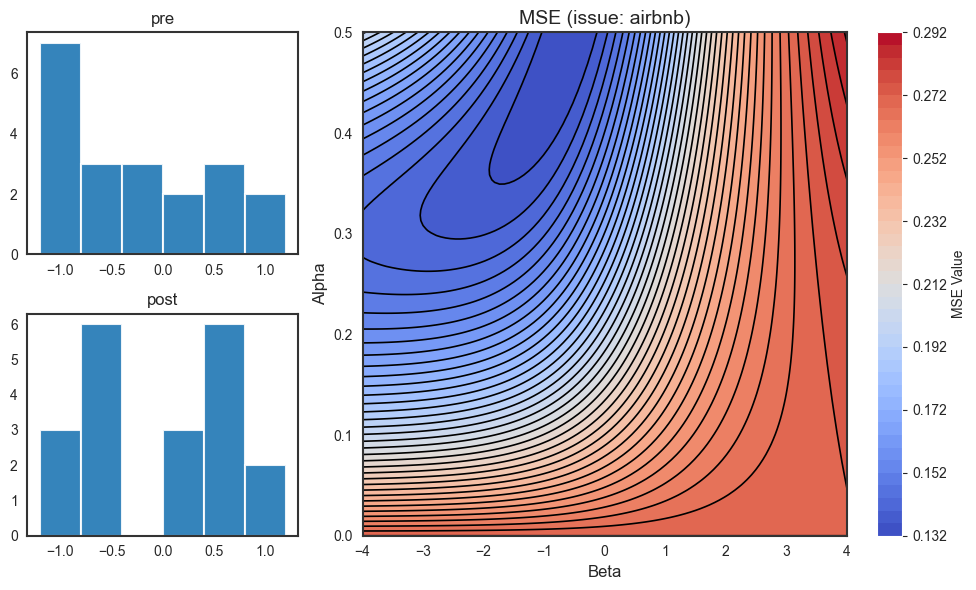

In [20]:
import matplotlib.gridspec as gridspec

# Create a contour plot
#plt.figure(figsize=(10, 6))
#fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharey=False, facecolor="white")
# for ax in axes:
#     ax.set_facecolor("white")  # White background for each subplot
#     #ax.grid(axis="both", linestyle="-", alpha=0.7, color="gray")
#     #ax.set_xlabel("Attitude", fontsize=14)
#     for spine in ax.spines.values():
#         spine.set_visible(True)  # Ensure all spines are visible
#         spine.set_edgecolor([0.2,0.2,0.2])  # Set the frame color
#         spine.set_linewidth(1.5)  # Adjust the frame thickness


# Create the figure and define the grid
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 3, figure=fig)

alpha_mesh, beta_mesh = np.meshgrid(alpha_range, beta_range, indexing='ij')
bins = [-1.2, -0.8, -0.4, 0.0, 0.4, 0.8, 1.2]

# Smaller plot 1 (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(Obs_filtered[:,0], bins=bins, label=["Active", "All"], stacked=True,alpha=0.9,edgecolor="white", linewidth=1.5)
ax1.set_title("pre", fontsize=12)
ax1.set_facecolor("white")
for spine in ax1.spines.values():
    spine.set_visible(True)  # Ensure all spines are visible
    spine.set_edgecolor([0.2,0.2,0.2])  # Set the frame color
    spine.set_linewidth(1.5)  # Adjust the frame thickness

# Smaller plot 2 (bottom-left)
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(Obs_filtered[:,1], bins=bins, label=["Active", "All"], stacked=True,alpha=0.9,edgecolor="white", linewidth=1.5)
ax2.set_title("post", fontsize=12)
ax2.set_facecolor("white")
for spine in ax2.spines.values():
    spine.set_visible(True)  # Ensure all spines are visible
    spine.set_edgecolor([0.2,0.2,0.2])  # Set the frame color
    spine.set_linewidth(1.5)  # Adjust the frame thickness

# Large plot spanning 2 rows and 2 columns
ax3 = fig.add_subplot(gs[:, 1:])  # Spans all rows in columns 1 and 2

plotdata = mse_values
contour = ax3.contourf(beta_mesh, alpha_mesh, plotdata, levels=50, cmap='coolwarm')
contour_lines = ax3.contour(beta_mesh, alpha_mesh, plotdata, levels=50, colors='black', linewidths=1.2)

#ax3.colorbar(contour, label='MSE Value')
cbar = plt.colorbar(contour, ax=ax3)  # Associate the colorbar with ax3
cbar.set_label('MSE Value')  # Set label for the colorbar
ax3.set_xlabel("Beta", fontsize=12)
ax3.set_ylabel("Alpha", fontsize=12)
#ax3.set_title(f"MSE ({group} on {topic[16:]})", fontsize=14)
ax3.set_title(f"MSE (issue: {topic[16:]})", fontsize=14)
for spine in ax3.spines.values():
    spine.set_visible(True)  # Ensure all spines are visible
    spine.set_edgecolor([0.2,0.2,0.2])  # Set the frame color
    spine.set_linewidth(1.5)  # Adjust the frame thickness

fig.tight_layout()

plt.savefig("MSE.pdf", format="pdf",facecolor="white")
fig.savefig("MSE.png", format="png",facecolor="white")
plt.show()


-1.0
-0.6
-0.19999999999999996
0.19999999999999996
0.6000000000000001
1.0


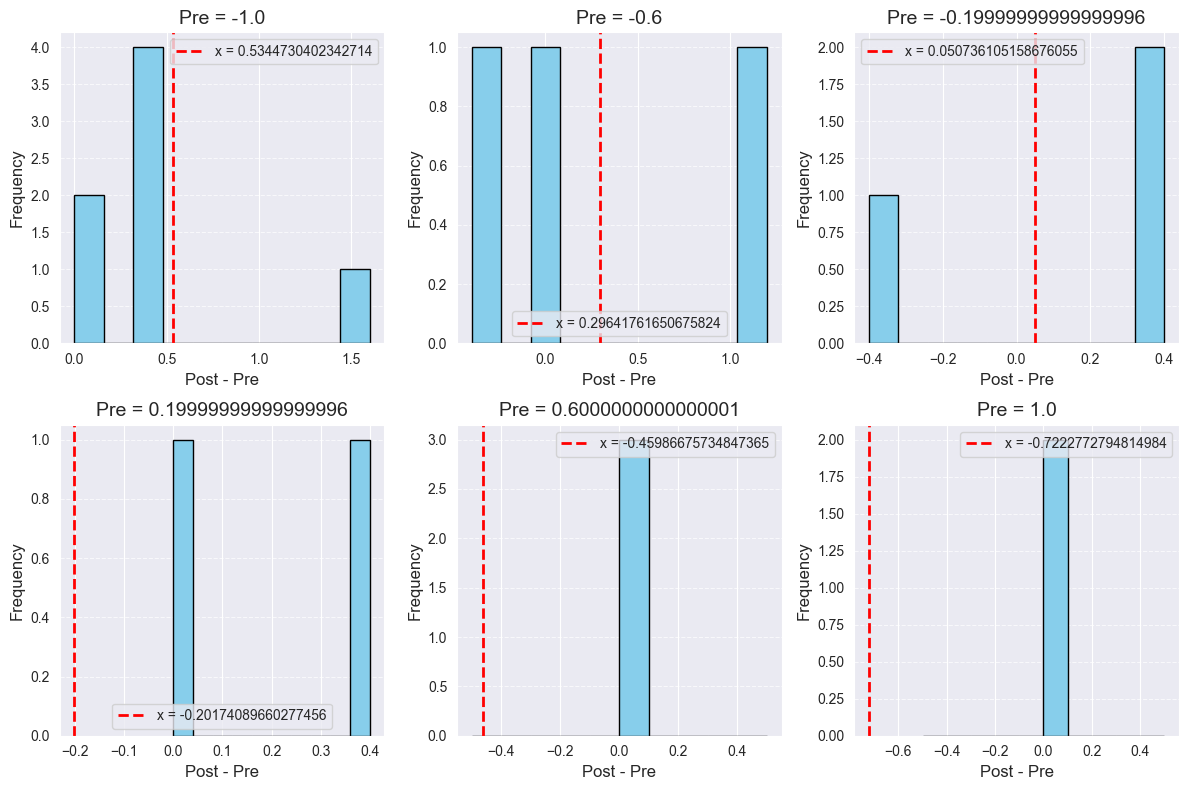

In [21]:
pre = Obs_filtered[:,0]
post = Obs_filtered[:,1]

differences = post - pre

# Define consistent bins
bins = np.linspace(-2, 2, 11)  # Adjust the bin range and granularity as needed

# Unique values in pre
unique_pre = np.unique(pre)

# Plot conditional histograms
plt.figure(figsize=(12, 8))
for i, condition in enumerate(unique_pre):
    # Filter differences for the current pre condition
    condition_differences = differences[pre == condition]
    print(condition)

    # Define consistent bins for all histograms
    #bins = np.linspace(-2, 2, 9)  # Adjust bin edges if necessary

    # Create subplot
    plt.subplot(2, 3, i + 1)  # Adjust grid size for unique_pre
    plt.hist(condition_differences, edgecolor="black", color="skyblue", align="mid")
    plt.title(f"Pre = {condition}", fontsize=14)
    plt.xlabel("Post - Pre", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Draw a vertical line at x
    discussion = np.mean( (GOact[tx,:] - 1)/2.5 - 1 )
    #print(discussion)
    x = optimal_alpha * ( (discussion - condition) + ( 1 - discussion*condition ) * np.tanh( optimal_beta * condition / 2 ) )
    #print(x)
    plt.axvline(x=x, color="red", linestyle="--", linewidth=2, label=f"x = {x}")
    plt.legend(fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:

print(df_pre_atts.shape,df_post_atts_clean.shape)

for ux,user in enumerate(users):
    ux_post = df_post_atts_clean[ df_post_atts_clean['ParticipantID'] == user ].values
    ux_pre = df_pre_atts[ df_pre_atts['ParticipantID'] == user ].values
    




transition_matrix = np.zeros((num_states, num_states))

# Loop over rows in Obs and extract first two columns
for row in Obs[:, :2]:  # Extract only the first two columns
    pre, post = row  # Unpack inside the loop

    # Ensure pre and post exist in states before indexing
    if pre in states and post in states:
        i = np.where(states == pre)[0][0]  # Row index (pre-state)
        j = np.where(states == post)[0][0]  # Column index (post-state)
        transition_matrix[i, j] += 1  # Increment count

# Normalize each row to get transition probabilities (avoid division by zero)
row_sums = transition_matrix.sum(axis=1, keepdims=True)
transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums != 0)

# Convert to DataFrame for readability
transition_df = pd.DataFrame(transition_matrix, index=states, columns=states)



(398, 22) (338, 22)
[[6 1 3 4 2.0 5.0 4.0 5.0 1.0 4 1 6.0 5.0 6 3 2 6 2 2 6 '5411f6ab06'
  'DiscussPolitics4']] -> [[5.0 1.0 4.0 4.0 2.0 3.0 5.0 5.0 1.0 4.0 1.0 6.0 6.0 5.0 3.0 2.0 6.0 3.0
  2.0 5.0 '5411f6ab06' 'DiscussPolitics4']]
[[5 2 1 6 6.0 1.0 1.0 5.0 1.0 4 5 6.0 1.0 1 2 1 4 4 3 2 '592a5b3064'
  'DiscussPolitics2']] -> [[5.0 3.0 1.0 5.0 6.0 2.0 1.0 3.0 1.0 3.0 5.0 6.0 2.0 1.0 3.0 1.0 4.0 4.0
  4.0 3.0 '592a5b3064' 'DiscussPolitics2']]
[[6 1 4 2 2.0 5.0 3.0 5.0 2.0 5 1 6.0 6.0 6 2 1 6 2 1 3 'c8ab9fcde2'
  'DiscussPolitics2']] -> [[5.0 1.0 4.0 3.0 3.0 4.0 4.0 3.0 2.0 4.0 2.0 6.0 6.0 6.0 3.0 1.0 6.0 3.0
  2.0 3.0 'c8ab9fcde2' 'DiscussPolitics2']]
[[5 1 1 5 1.0 5.0 2.0 6.0 2.0 5 1 6.0 6.0 6 1 1 6 2 1 1 'e8d5667297'
  'DiscussPolitics3']] -> [[5.0 1.0 1.0 4.0 1.0 5.0 2.0 6.0 2.0 3.0 1.0 6.0 6.0 6.0 1.0 1.0 6.0 2.0
  1.0 1.0 'e8d5667297' 'DiscussPolitics3']]
[[3 1 2 4 1.0 5.0 6.0 4.0 2.0 4 1 6.0 6.0 6 1 1 5 1 1 5 '20ea4d8991'
  'DiscussPolitics4']] -> [[5.0 1.0 4.0 5.0 1.0 4.0 5.0 1.0

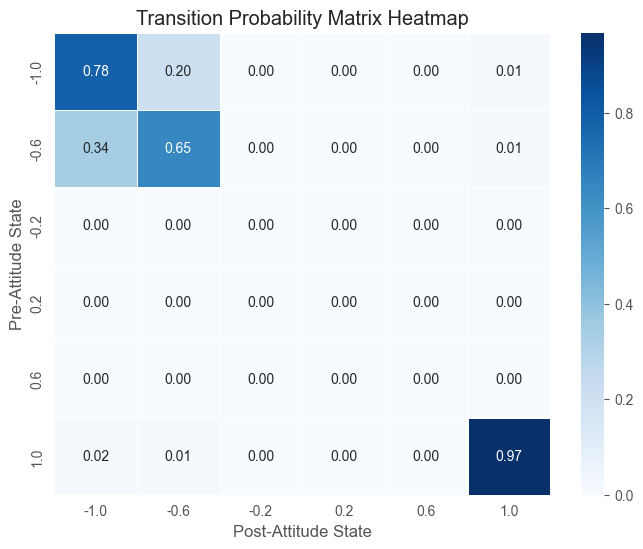

In [36]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(transition_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Labels & Title
plt.xlabel("Post-Attitude State")
plt.ylabel("Pre-Attitude State")
plt.title("Transition Probability Matrix Heatmap")

# Show plot
plt.show()

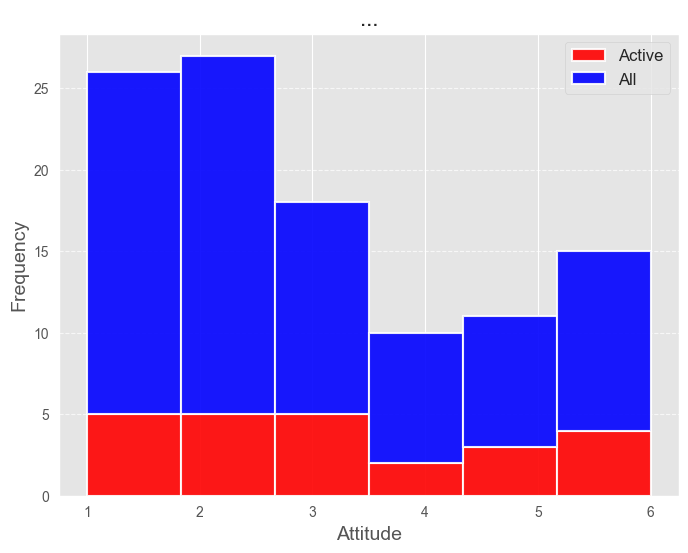

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Example DataFrame
data = {
    "Column1": attsAll,
    "Column2": attsAct,
}
df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
#plt.hist(df["Column1"], bins=10, alpha=0.5, label="All ", edgecolor="black")
#plt.hist(df["Column2"], bins=10, alpha=0.5, label="Active", edgecolor="black")

plt.hist([df["Column2"], df["Column1"]], bins=6, label=["Active", "All"], stacked=True,color=colors,alpha=0.9,edgecolor="white", linewidth=1.5)

#plt.hist(df["Column1"], bins=10, alpha=0.7, label="Column1", edgecolor="white", linewidth=1.5, color="steelblue")
#plt.hist(df["Column2"], bins=10, alpha=0.7, label="Column2", edgecolor="white", linewidth=1.5, color="darkorange")

#plt.hist([df["Column2"], df["Column1"]], bins=10, label=["Active", "All"], stacked=False)
#plt.hist([df["Column1"], df["Column2"]], bins=10, alpha=0.7, label=["Column1", "Column2"], color=colors)


# Add titles and legend
plt.title("...", fontsize=16)
plt.xlabel("Attitude", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()